In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("MF_root_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n61          3.1430 ( 2.5228,  3.8155) ( 2.5089,  3.7974)  1.2885 (Jnode 118)\n',
 't_n62          1.7468 ( 1.3133,  2.2617) ( 1.2912,  2.2299)  0.9387 (Jnode 117)\n',
 't_n63          1.6970 ( 1.2743,  2.1976) ( 1.2610,  2.1771)  0.9162 (Jnode 116)\n',
 't_n64          1.6536 ( 1.2413,  2.1430) ( 1.2198,  2.1154)  0.8955 (Jnode 115)\n',
 't_n65          1.2776 ( 0.9465,  1.6779) ( 0.9364,  1.6610)  0.7246 (Jnode 114)\n',
 't_n66          0.6966 ( 0.4908,  0.9539) ( 0.4793,  0.9356)  0.4563 (Jnode 113)\n',
 't_n67          0.5913 ( 0.4117,  0.8149) ( 0.4017,  0.7994)  0.3978 (Jnode 112)\n',
 't_n68          0.3872 ( 0.2576,  0.5534) ( 0.2458,  0.5366)  0.2908 (Jnode 111)\n',
 't_n69          0.0414 ( 0.0173,  0.0839) ( 0.0140,  0.0759)  0.0619 (Jnode 110)\n',
 't_n70          0.4844 ( 0.3311,  0.6771) ( 0.3229,  0.6622)  0.3393 (Jnode 109)\n',
 't_n71          0.3618 ( 0.2140,  0.5439) ( 0.2050,  0.5311)  0.3262 (Jnode 108)\n',
 't_n72          0.1028 ( 0.0574,  0.1693) ( 0.0535,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119']

In [6]:
posterior_mean_iqtree

[3.143,
 1.7468,
 1.697,
 1.6536,
 1.2776,
 0.6966,
 0.5913,
 0.3872,
 0.0414,
 0.4844,
 0.3618,
 0.1028,
 0.599,
 0.4101,
 0.4793,
 0.1413,
 0.0506,
 0.0131,
 1.549,
 1.2523,
 0.9111,
 0.6983,
 0.3597,
 0.5746,
 0.7548,
 0.7071,
 0.4744,
 0.2783,
 0.2031,
 0.0843,
 0.3979,
 0.2969,
 0.4446,
 0.6741,
 0.54,
 0.4182,
 0.2784,
 0.1098,
 0.0808,
 0.06,
 0.0378,
 0.196,
 0.0671,
 0.389,
 0.2682,
 0.179,
 0.0513,
 0.424,
 0.2705,
 1.4457,
 1.3541,
 0.5538,
 0.138,
 0.1088,
 0.0377,
 0.2925,
 0.224,
 1.9675,
 0.9128]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("GTR_G4_root_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[3.1263,
 1.7379,
 1.6833,
 1.639,
 1.2734,
 0.6992,
 0.5941,
 0.3916,
 0.0425,
 0.4862,
 0.3627,
 0.1023,
 0.6048,
 0.4177,
 0.4877,
 0.1477,
 0.0513,
 0.0133,
 1.533,
 1.2387,
 0.9032,
 0.6941,
 0.3581,
 0.5715,
 0.7453,
 0.6981,
 0.4698,
 0.2744,
 0.2046,
 0.0848,
 0.3936,
 0.2932,
 0.4409,
 0.6722,
 0.5382,
 0.4203,
 0.2792,
 0.1098,
 0.0806,
 0.0599,
 0.0379,
 0.1961,
 0.0666,
 0.3905,
 0.2701,
 0.1802,
 0.0513,
 0.4247,
 0.2702,
 1.4401,
 1.3458,
 0.5548,
 0.1385,
 0.1091,
 0.0359,
 0.2995,
 0.2299,
 1.9709,
 0.9138]

In [12]:
posterior_mean_iqtree

[3.143,
 1.7468,
 1.697,
 1.6536,
 1.2776,
 0.6966,
 0.5913,
 0.3872,
 0.0414,
 0.4844,
 0.3618,
 0.1028,
 0.599,
 0.4101,
 0.4793,
 0.1413,
 0.0506,
 0.0131,
 1.549,
 1.2523,
 0.9111,
 0.6983,
 0.3597,
 0.5746,
 0.7548,
 0.7071,
 0.4744,
 0.2783,
 0.2031,
 0.0843,
 0.3979,
 0.2969,
 0.4446,
 0.6741,
 0.54,
 0.4182,
 0.2784,
 0.1098,
 0.0808,
 0.06,
 0.0378,
 0.196,
 0.0671,
 0.389,
 0.2682,
 0.179,
 0.0513,
 0.424,
 0.2705,
 1.4457,
 1.3541,
 0.5538,
 0.138,
 0.1088,
 0.0377,
 0.2925,
 0.224,
 1.9675,
 0.9128]

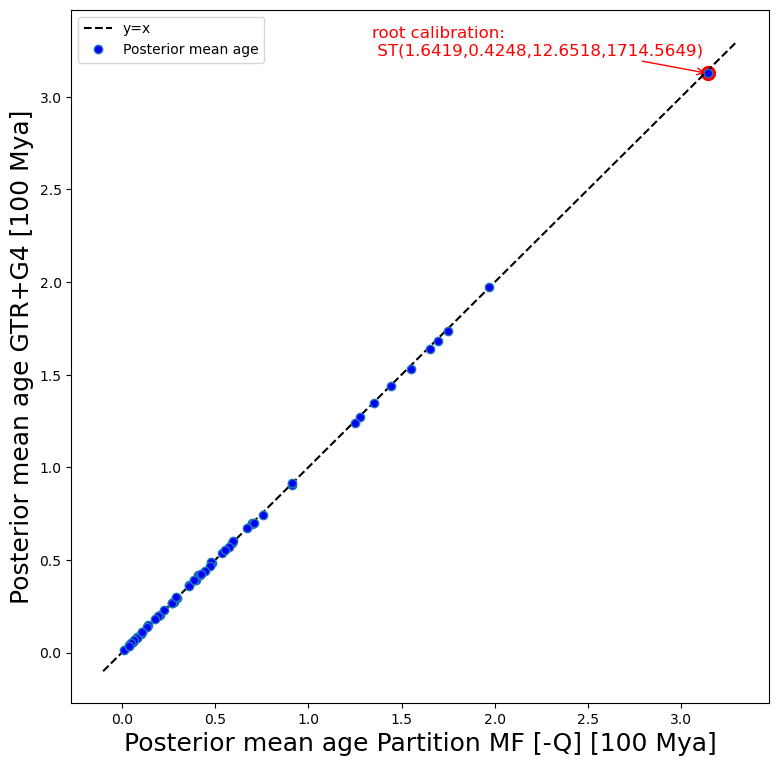

In [16]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,3.3], 
        [-0.1, 3.3], 
        'k--', label='y=x')
points = ax.plot(posterior_mean_iqtree, posterior_mean_baseml, 'o', label='Posterior mean age')

points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[4], posterior_mean_baseml[4], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n ST(1.6419,0.4248,12.6518,1714.5649)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0]-1.8,  posterior_mean_baseml[0]+0.1 ),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
# ax.annotate('middle calibration:\n B(0.2304,0.5600)', 
#         xy=(posterior_mean_iqtree[4], posterior_mean_baseml[4]), 
#         xytext=(posterior_mean_iqtree[4]+0.8 ,  posterior_mean_baseml[4] ),  # Offset position for the label
#         arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
#         fontsize=12, color='red') 
 
# Labels and title
ax.set_ylabel('Posterior mean age GTR+G4 [100 Mya]', fontsize=18)
ax.set_xlabel('Posterior mean age Partition MF [-Q] [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and Partition MF [-p] [t199 ~ B(10.3300,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./afrotheria_posterior_mean_age_comparison_partition_MF_p_root_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')